In [112]:
%matplotlib notebook

import time
from wandelscript.metamodel import Skill, register_builtin_func
from wandelscript.viewer import SkillViewer
import math
import numpy as np

import matplotlib.pyplot as plt
import open3d as o3d
import pickle

from cameraRobotCalibration import *

# To autoreload imported libraries:    
%load_ext autoreload
%autoreload 2
# ---------------------------------------------------------------------------
# Saving captures


# class simplifiedCapture():
#     ''' Simplified capture class, so that captures can be saved with pickle.
#         this is the simplified version of the class:
#             from wandelpy.azurekinect2 import AzureKinect 
#             kinect = AzureKinect() 
#             capture = kinect() 
#     '''
#     def __init__(self, capture, comment='noComment'):
#         self.color = capture.color()
#         self.color_depth2d = capture.color(Camera.DEPTH2d)
#         self.depth = capture.depth()
#         self.depth3d = capture.depth(Camera.DEPTH3d)
#         self.ir = capture.ir()
#         self.pointcloud_np = np.asarray(capture.pointcloud_o3d().points)
#         self.comment = comment

# def npArrayInfoPrint(infoString, inArray1, inArray2=None):
#     print(10*'-', '\n', infoString)
#     print("Shape: ", inArray1.shape)
#     print("array 1 - Min, max: ", np.min(inArray1), np.max(inArray1))
#     if inArray2 is not None:
#         print("array 2 - Min, max: ", np.min(inArray2), np.max(inArray2)) 
#     print("Avg:", np.average(inArray1))
#     print("dtype: ", inArray1.dtype)
#     print(10*'-')


# ---------------------------------------------------------------------------



from wandelpy.azurekinect2 import AzureKinect, Camera 
try:
    kinect = AzureKinect() 
    print("\n\nSuccess with connecting to camera.")
except:
    time.sleep(1)
    print("Camera couldn't be connected. Use the notebook with loading captures.")
    
    
    
print(3*'\n')
print("Defined parameters:")
print("Max depth (for cut off): ", maxDepth:=1500)
print("Max ir value (for cut off): ", maxIrValue:=800)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[2022-05-09 08:24:01.760] [error] [t=68093] /home/patrick/development/3rdparty/Azure-Kinect-Sensor-SDK/src/usbcommand/usbcommand.c (748): usb_cmd_io(). Error calling libusb_bulk_transfer for initial tx, result:LIBUSB_ERROR_NO_DEVICE
[2022-05-09 08:24:01.760] [error] [t=68093] /home/patrick/development/3rdparty/Azure-Kinect-Sensor-SDK/src/usbcommand/usbcommand.c (950): usb_cmd_io(usbcmd_handle, cmd, p_cmd_data, cmd_data_size, NULL, 0, p_data, data_size, NULL, cmd_status) returned failure in usb_cmd_write_with_status()
[2022-05-09 08:24:01.760] [error] [t=68093] /home/patrick/development/3rdparty/Azure-Kinect-Sensor-SDK/src/depth_mcu/depth_mcu.c (355): usb_cmd_write_with_status(depthmcu->usb_cmd, DEV_CMD_DEPTH_STREAM_STOP, NULL, 0, NULL, 0, &cmd_status) returned failure in depthmcu_depth_stop_streaming()
[2022-05-09 08:24:01.760] [error] [t=68093] /home/patrick/development/3rdparty/Azure-Kinect-Sensor

In [116]:
# Capture an image before
capture = kinect() 
sCapture1 = simplifiedCapture(capture)


In [117]:
# Capture an image after
capture = kinect() 
sCapture2 = simplifiedCapture(capture)


<IPython.core.display.Javascript object>


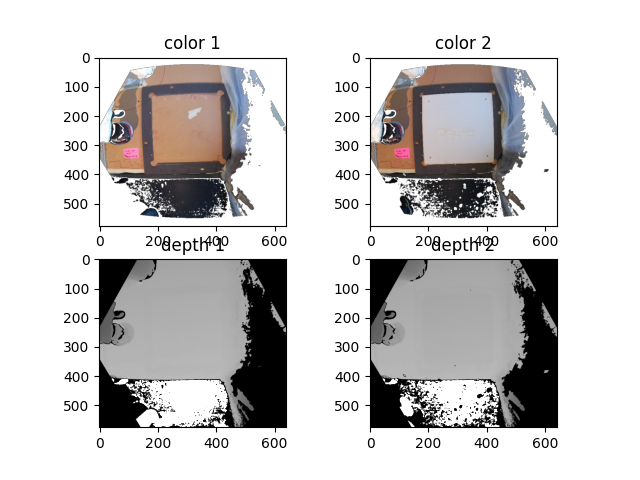

<IPython.core.display.Javascript object>


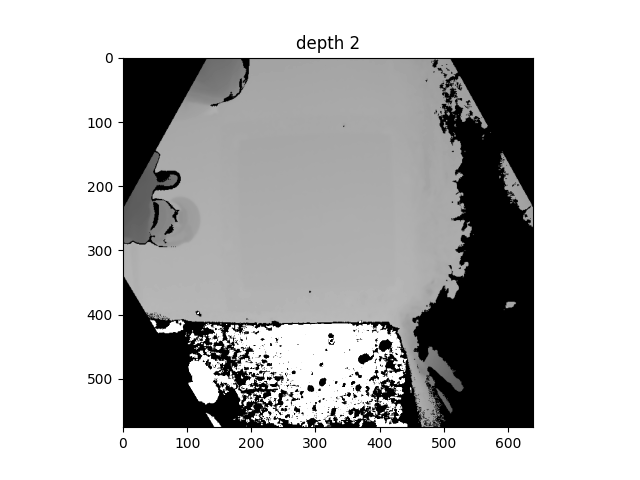

Text(0.5, 1.0, 'depth 2')

In [118]:
# ##################################################################
# PREVIEW images:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(sCapture1.color_depth2d)
ax1.set_title("color 1")

# Or show the depth image
ax2.imshow(sCapture2.color_depth2d)
ax2.set_title("color 2")


ax3.imshow(sCapture1.depth, cmap='gray', vmin=0, vmax=maxDepth)
ax3.set_title("depth 1")
ax4.imshow(sCapture2.depth, cmap='gray', vmin=0, vmax=maxDepth)
ax4.set_title("depth 2")


plt.figure()
plt.imshow(sCapture2.depth, cmap='gray', vmin=0, vmax=maxDepth)
plt.title("depth 2")

In [119]:
# ------------------------------------------------------
# Save the captures:
# sCapture1
# sCapture2


fileName = 'img1.pkl'
fileName = 'V2_cardboard_04.pkl'
fileName = 'V3_Sojka_cardboard_03.pkl' # 
fileName = 'V4_Sojka_realpiece_02.pkl'

with open(fileName, 'wb') as fileOut:
    listOfCaptures = [sCapture1, sCapture2]
    pickle.dump(listOfCaptures, fileOut)
    
print(f'File {fileName} saved.')
    
# ------------------------------------------------------

File V4_Sojka_realpiece_01.pkl saved.


In [9]:
# Load the captures:
fileLoad = 'test2.pkl'   # 2 completely different images
fileLoad = 'set2.pkl'    # Images with one object difference - direciton into a corner
fileLoad = 'cell1.pkl'    # Image in the cell - Bumpy metal piece
fileLoad = 'cell2.pkl'    # Image in the cell - Thick wooden piece
fileLoad = 'cell3.pkl'    # Image in the cell - Thin wooden plank
fileLoad = 'cell4.pkl'    # Image in the cell - Thin wooden plank - at an angle

# V2: means the sCapture was updated - to have color_depth2d and depth3d
fileLoad = 'V2_cardboard_01.pkl'    # Cardboard box with a stick-it note 
fileLoad = 'V2_cardboard_02.pkl'    # L-shaped box with 3 stick-it notes 
fileLoad = 'V2_cardboard_03.pkl'    # Camera angled - Zigzag shaped box with 3 stick-it notes 


fileName = 'V3_Sojka_cardboard_01.pkl' # rectangular Cardboard in sojka cell
fileName = 'V3_Sojka_cardboard_02.pkl' # First aid box

fileName = 'V4_Sojka_realpiece_01.pkl' # Real piece, with glue, but grinded

fileLoad = 'V2_cardboard_03.pkl'    # L-shaped box with 3 stick-it notes 

# fileLoad = 'set1.pkl'    # Images with one object difference
with open(fileLoad, 'rb') as fileIn:
    sCapture1, sCapture2 = pickle.load(fileIn)

print(f'File {fileLoad} loaded.')

File V2_cardboard_03.pkl loaded.


In [120]:
# Recognize the difference
def differenceMask(depth1, depth2, objectThickness, image_w_object=None, showImages=False):
    """ 
        Recognize the difference between two images. depth2 is the image after:
        ~ depth2 - depth1
    """
    maskThresholdValue = objectThickness / 2
    
    
    diff = np.array(depth2 - depth1, dtype=np.int16)
    
    npArrayInfoPrint("depth1, depth2:", depth1, depth2)
    npArrayInfoPrint("diff:", diff)
    
    
    
    maxVal = 2*objectThickness
    minVal = -maxVal
    
    # figure:
    if showImages:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        ax1.imshow(diff, cmap='gray', vmin=minVal, vmax=maxVal)
        ax1.set_title("diff (in object Thickness scale)")

    # Some filtering:
    diff_t = diff.copy()                    # two way threshold
    diff_t[diff_t < -2*objectThickness] = 0 # difference is more than expected
    diff_t[0 < diff_t] = 0                  # difference is positive - points are further away
    diff_t = -diff_t
    
    
    
    
    diff_mask = np.asarray(diff, dtype=np.bool_)
    diff_mask[:] = False
    diff_mask[diff_t > maskThresholdValue] = True
    
    
    if showImages:
        ax2.imshow(diff_t, cmap='gray', vmin=0, vmax=objectThickness)
        ax2.set_title("diff thresholded")
        
        ax3.imshow(diff_mask)
        
        if image_w_object is not None:
            image_w_overlay = image_w_object.copy()
            ax4.imshow(image_w_overlay, cmap='gray', vmin=0, vmax=maxIrValue)

            # Construct the overlay:
            overlay = np.zeros( (diff.shape[0], diff.shape[1], 4), dtype=np.uint8)
            overlay[diff_mask] = (0, 150, 0, 80)
            ax4.imshow(overlay)

    return diff_mask


# Visualise detection and fill pattern:
def visualiseOnIr(ir, mask=None, path=None):
    '''
        Visualise on ir image. (if mask and path both none, just show ir image)
        - Visualise object detection (through a mask) 
        - fill pattern
        
    '''
     # Show full size figure with only the image and overlay
    
    
    plt.figure()
    plt.imshow(ir, cmap='gray', vmin=0, vmax=maxIrValue*2)
    plt.title("Visualise on IR image")
    
    if mask is not None:
        overlay = np.zeros( (ir.shape[0], ir.shape[1], 4), dtype=np.uint8)
        overlay[mask] = (0, 150, 0, 80)

        plt.imshow(overlay)
        
    if path is not None:
        plt.plot(path[:, 0], path[:, 1], 'r-')
        

---------- 
 depth1, depth2:
Shape:  (576, 640)
array 1 - Min, max:  0 2163
array 2 - Min, max:  0 10265
Avg: 743.2437147352431
dtype:  uint16
----------
---------- 
 diff:
Shape:  (576, 640)
array 1 - Min, max:  -2163 8264
Avg: -24.149739583333332
dtype:  int16
----------


<IPython.core.display.Javascript object>


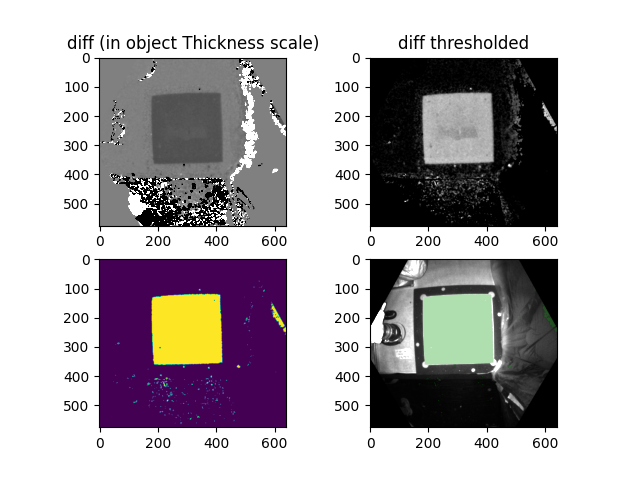

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


<IPython.core.display.Javascript object>


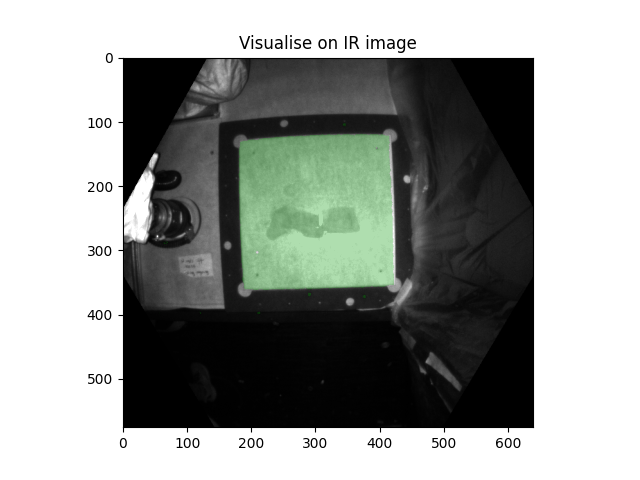

In [125]:
##############################################################
# Call the functions for recognizing the object 

mask = differenceMask(sCapture1.depth, sCapture2.depth, objectThickness=40, 
                      image_w_object=sCapture2.ir, showImages=True)

print(mask)
mask[400:,:] = False
mask[:,450:] = False

visualiseOnIr(sCapture2.ir, mask)

[[309 120]
 [404 120]
 [414 160]
 [180 160]
 [180 200]
 [417 200]
 [419 240]
 [181 240]
 [182 280]
 [419 280]
 [420 320]
 [184 320]
 [189 360]
 [332 360]]


<IPython.core.display.Javascript object>


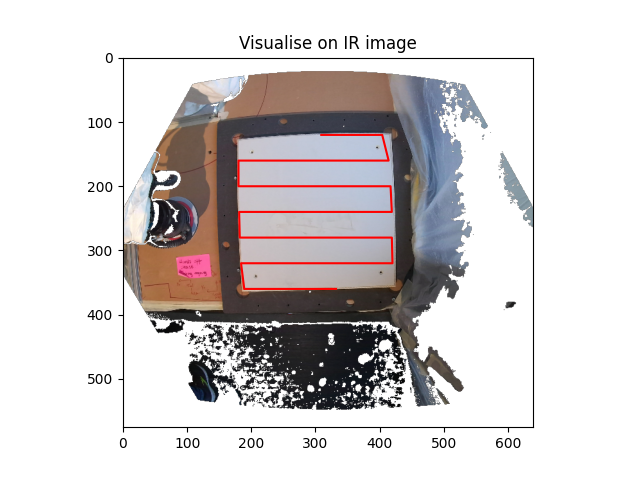

In [175]:
#################################################################
# Fill pattern

from wbigeometry.core.algorithm.fillpattern import generate_path

stridePixels = 40 # Todo: compute it from real distance (based on depth data)
fillPattern = generate_path(mask, stridePixels)
print(fillPattern)

visualiseOnIr(sCapture2.color_depth2d, mask=None, path=fillPattern)

In [176]:
### #######################################################################################
### #######################################################################################
### Depth image to point cloud
### #######################################################################################
### #######################################################################################

# capture = kinect()



# type(capture)
# p3 = capture.depth(Camera.DEPTH3d)
# print(p3.shape)

p3 = sCapture2.depth3d


In [177]:
pc_np = p3.copy()
print(pc_np.shape)

pc_np[mask == False] = [0,0,0]
print(pc_np.shape)



print('fillPattern shape:', fillPattern.shape)

path3D_CS = np.zeros((fillPattern.shape[0],3))
for k, point2D in enumerate(fillPattern):
    pixel_i = point2D[1]
    pixel_j = point2D[0]
    
    point3D = pc_np[pixel_i, pixel_j]
    path3D_CS[k] = point3D
    print(point3D)


(576, 640, 3)
(576, 640, 3)
fillPattern shape: (14, 2)
[ -20 -448  980]
[ 181 -456  987]
[ 198 -365  991]
[-291 -369  986]
[-288 -282  994]
[ 204 -280 1003]
[ 208 -198 1016]
[-286 -198 1007]
[-284 -116 1019]
[ 208 -115 1027]
[ 212  -33 1039]
[-282  -33 1029]
[-275   52 1043]
[  28   51 1050]


<IPython.core.display.Javascript object>


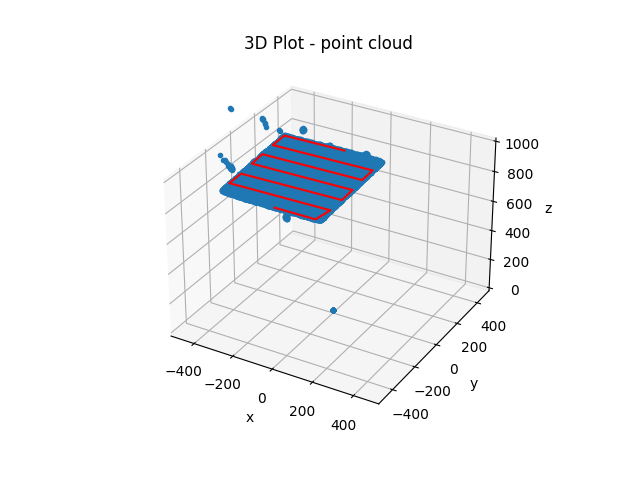

In [178]:
# plt.figure()
# plt.imshow(p3)

# Matplotlib 3D plot:

plt.figure()
ax = plt.axes(projection ='3d')

# plotting



X = pc_np[:,:, 0].flatten()
Y = pc_np[:,:, 1].flatten()
Z = pc_np[:,:, 2].flatten()





ax.plot3D(X, Y, Z, '.')
ax.plot3D(path3D_CS[:, 0], path3D_CS[:, 1], path3D_CS[:, 2], 'r-')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

limVal = 0.5*1000
limOffset = 0.5*1000
ax.set_xlim(-limVal, limVal)
ax.set_ylim(-limVal, limVal)
ax.set_zlim(-limVal+limOffset, limVal+limOffset)

ax.set_title(f'3D Plot - point cloud')
plt.show()

<IPython.core.display.Javascript object>


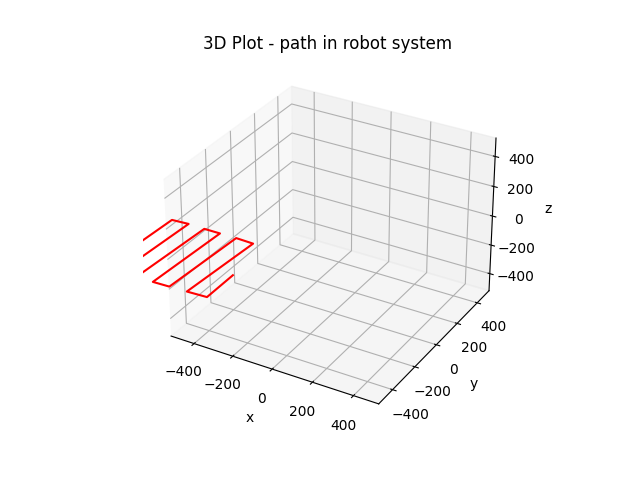

Path3D_RS
[[-2.11884657e+02 -4.83019683e+02 -6.68900955e+00]
 [-2.11753748e+02 -6.84292648e+02 -8.47129210e+00]
 [-3.03011022e+02 -6.97926342e+02  2.76725790e-02]
 [-2.81677168e+02 -2.09466326e+02 -1.06343812e+01]
 [-3.69022370e+02 -2.09370995e+02 -7.05573860e+00]
 [-3.89006343e+02 -7.01008072e+02 -5.26976888e-01]
 [-4.72093642e+02 -7.02231838e+02 -2.52778284e+00]
 [-4.54022587e+02 -2.08520999e+02 -8.85589977e+00]
 [-5.36909324e+02 -2.07720796e+02 -9.92755304e+00]
 [-5.55770450e+02 -6.99369724e+02 -2.53909867e+00]
 [-6.38725532e+02 -7.00567399e+02 -3.54902720e+00]
 [-6.20522260e+02 -2.06830470e+02 -8.88626671e+00]
 [-7.06816187e+02 -2.10963320e+02 -1.13918086e+01]
 [-7.17105272e+02 -5.13862509e+02 -9.10783545e+00]]


In [179]:
# # Transformation H_CR - for image 'V2_cardboard_03.pkl :
# H_CR = np.array([[ 9.16305722e-01,  2.98453864e-01,  2.67037667e-01,
#         -5.98740339e+01],
#        [ 3.13802101e-01, -9.49358194e-01, -1.57245199e-02,
#         -1.12928275e+02],
#        [ 2.48821354e-01,  9.82054485e-02, -9.63557795e-01,
#          8.00976470e+02],
#        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
#          1.00000000e+00]])

# Transformation H_CR _ for the camera in Sojka cell:
H_CR = np.array([[-3.41722790e-02, -9.90631633e-01, -1.32216576e-01,
        -5.26798830e+02],
       [-9.98939322e-01,  3.79410574e-02, -2.60903634e-02,
        -4.60432320e+02],
       [ 3.08623760e-02,  1.31184769e-01, -9.90877424e-01,
         1.02375889e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])



path3D_RS = homo_transform(H_CR, path3D_CS)


plt.figure()
ax = plt.axes(projection ='3d')



ax.plot3D(path3D_RS[:, 0], path3D_RS[:, 1], path3D_RS[:, 2], 'r-')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

limVal = 0.5*1000
limOffset = 0*1000
ax.set_xlim(-limVal, limVal)
ax.set_ylim(-limVal, limVal)
ax.set_zlim(-limVal+limOffset, limVal+limOffset)

ax.set_title(f'3D Plot - path in robot system')
plt.show()

print('Path3D_RS')
print(path3D_RS)

<IPython.core.display.Javascript object>


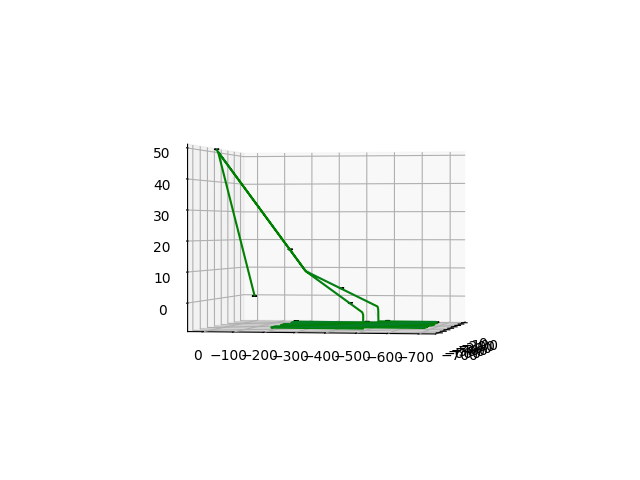

type: <class 'list'>
[Pose(position=Position(x=-211.88465731599996, y=-483.0196834072, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-211.75374836299994, y=-684.2926481322, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-303.011022013, y=-697.9263418364, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-281.67716816999996, y=-209.46632579100003, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-369.02236968599993, y=-209.3709946704, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-389.00634340399995, y=-701.0080722502, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-472.09364191399993, y=-702.2318375556, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-454.022586904, y=-208.52099921700002, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-536.909324

In [181]:
### Robot movement:

from typing import List
from wandelscript.metamodel import Pose, Position, Orientation
import wandelscript.plugins

fillPatternPath = path3D_RS.copy()
z_offset = 0  # offset in z [mm]
z_grindingHeight = -8

fillPatternPath[:, 2] = z_grindingHeight
fillPatternPath[:, 2] += z_offset


@register_builtin_func
def getFillPattern() -> List[Pose]:
    orientation = [3.14, 0, 0]
    r = list(fillPatternPath)
    r = []
    for point in fillPatternPath:
        r.append(list(point) + orientation)
        
        
#     print(r)
    poses = [Pose(Position(*v), Orientation(*orientation)) for v in fillPatternPath]
    print('type:', type(poses))
    print(poses)
    return poses

# Home far above the workpiece to the side
# home := [-500, 0, 300, 3.14, 0, 0.0]

#

code1 = """
orientation_strategy := 'last'

z_offset := 5

home := [-580, 0, 50, 3.14, 0, 0.0]
aboveWorkpiece := [-580, -300, 10, 3.14, 0, 0.0]

move via p2p() to home
move via p2p() to aboveWorkpiece

fillPattern := getFillPattern()

python_print(fillPattern[len(fillPattern)-1])
pathFirstPoint := fillPattern[0]
pathLastPoint := fillPattern[len(fillPattern)-1]


move via line() to [0, 0, z_offset, 0, 0, 0] :: pathFirstPoint

for i := 0..len(fillPattern)-1:
    python_print(i)
    move via line() to fillPattern[i]

move via line() to [0, 0, z_offset, 0, 0, 0] :: pathLastPoint
move via p2p() to aboveWorkpiece
move via p2p() to home
"""
#move via line() to fillPattern[0] :: home

skill = Skill.from_code(code1)
SkillViewer().trace_skill(skill, length=0.3)



In [137]:
from wandelpy.robotcell import Robot
from wandelscript.metamodel import Skill, Store, MotionCollector, register_builtin_func #, Pose


from wandelscript.viewer import SkillViewer
from wandelpy.robotcell import RobotCell

# robot_cell = Robot.from_ip("192.168.101.1")

In [188]:

if False:
    robot = SimulatedRobot(
        initial_pose=PoseTensor([300, -400, 400], [1, 0, 0, 0]),
        tools={
            "camera": PoseTensor([0, 500, 0], [1, 0, 0, 0]),
            "flange": PoseTensor([0, 0, 0], [1, 0, 0, 0]),
            "tool": PoseTensor([0, 0, 300], [1, 0, 0, 0])
        }
    )
    sensor=MockedLineScanner(lambda: robot.get_pose("camera"))
else:
#     rest_connector = RestConnector(port=9000, host='192.168.101.26')
    robot = Robot.from_ip("192.168.101.1")
#     sensor = MicroEpsilonLineScanner(autoconnect=False)

# Robot cell:    
robot_cell = RobotCell(
    robot=robot,
#     sensor=sensor,
#     io=rest_connector,
    io=1,
#     timer=Timer(),
)
print('robot_cell initialized.')

robot_cell initialized.


In [189]:
robot_cell.get_state()

RobotState(pose=([-409.98730469,  410.72625732,  349.59075928], [ 9.19342313e-04,  9.23881709e-01, -3.82677068e-01, -5.84054030e-05]))

In [191]:
# %matplotlib tk

code_SimpleTest = """
home := [-600, -250, 500, 3.14, 0, 0.0]
move via p2p() to home
move via p2p() to [0, 0, -100, 0, 0, 0] :: home
move via p2p() to [50, 0, -100, 0, 0, 0] :: home
move via line() to home
"""

code_move2point = """
home := [-580, 0, 100, 3.14, 0, 0.0]
move via p2p() to home
move via line() to [-580, 0, 50, 3.14, 0, 0.0]
"""

code = code1
# code = code_move2point


# image := sync_take_image()
previewSimulation = 0

if previewSimulation:
    skill = Skill.from_code(code)
    SkillViewer().trace_skill(skill, length=0.3)

else:
    store = Store(MotionCollector(robot_cell))
    Skill.from_code(code)(store)

type: <class 'list'>
[Pose(position=Position(x=-211.88465731599996, y=-483.0196834072, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-211.75374836299994, y=-684.2926481322, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-303.011022013, y=-697.9263418364, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-281.67716816999996, y=-209.46632579100003, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-369.02236968599993, y=-209.3709946704, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-389.00634340399995, y=-701.0080722502, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-472.09364191399993, y=-702.2318375556, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-454.022586904, y=-208.52099921700002, z=-8.0), orientation=Orientation(x=3.14, y=0, z=0)), Pose(position=Position(x=-536.909324